## TP5 : Schémas de discrétisation d’EDS

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
def bsAsset(spot , r , sigma , T , N  ) :
    """
    Simulation de trajectoires du prix d'un actif sous-jacent dans le modèle de Black-Scholes.
    
    spot : prix initial (S0)
    r : taux sans risque
    sigma : volatilité
    T : horizon de temps
    N : nombre d'échantillons 
    """
    dt = T/N
    t = np.linspace(0,T , N + 1)
    W = np.concatenate(([0.] , np.cumsum(np.sqrt(dt)*np.random.randn(N))))
    res = spot*np.exp((r - 0.5*(sigma**2))*t + sigma*W)
    return (res , W)


def schema_euler(spot  , N , T ,r , sigma ,W):
    """
    """
    res = np.zeros(N+1)
    res[0] = spot 
    
    for i in range(1,N+1) :
        # dw = np.sqrt(T*i/N)*np.random.randn() - np.sqrt(T*(i-1)/N)*np.random.randn() 
        dw = W[i] - W[i -1]
        res[i] = res[i-1] + r*res[i-1]*(T/N) + sigma*res[i-1]*dw

    return res 



def schema_milshtein(spot , N , T , r , sigma , W) :
    """
    
    """
    res = np.zeros(N + 1)
    res[0] = spot 
    
    for i in range(1,N+ 1) :
        # dw = np.sqrt(T*i/N)*np.random.randn() - np.sqrt(T*(i-1)/N)*np.random.randn()
        dw = W[i] - W[i -1]
        res[i] = res[i-1] + (r*res[i-1] - 0.5*(sigma**2)*res[i-1])*(T/N) + sigma*res[i-1]*dw  + 0.5*res[i -1]*(sigma**2)*(dw**2)
 
    return res 


def erreur_schema(N , spot , r , sigma , T, M) :
    
    err_1 = 0 
    err_2 = 0 
    
    for _ in range(M) :
        sim_exacte , W = bsAsset(spot , r , sigma , T ,N )
        sim_euler = schema_euler(spot , N , T , r , sigma , W)
        sim_milshtein = schema_milshtein(spot , N , T , r , sigma , W)

        err_1 += max([(sim_exacte[i] - sim_euler[i])**2 for i in range(N)])
        err_2 += max([(sim_exacte[i] - sim_milshtein[i])**2 for i in range(N)]) 
    

    return (np.sqrt(err_1/M) , np.sqrt(err_2/M))



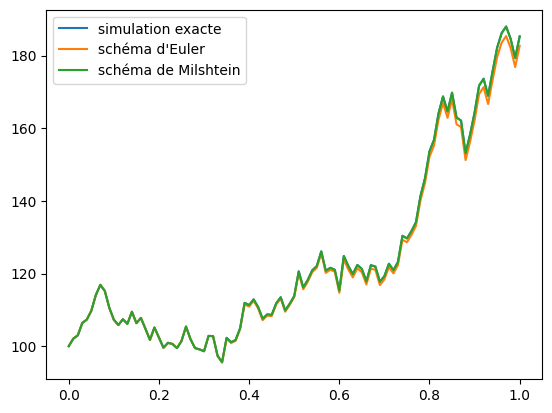

In [41]:
# Test :
N = 100
spot = 100
r = 0.03 
sigma = 0.25 
T = 1
M = 10000

sim_exacte , W = bsAsset(spot , r , sigma , T ,N )
sim_euler = schema_euler(spot , N , T , r , sigma ,W)
sim_milshtein = schema_milshtein(spot , N , T , r , sigma , W)
t = np.linspace(0 , T , N +1)

plt.plot(t , sim_exacte , label="simulation exacte")
plt.plot(t , sim_euler , label = "schéma d'Euler")
plt.plot(t , sim_milshtein , label = "schéma de Milshtein")
plt.legend()
plt.show()

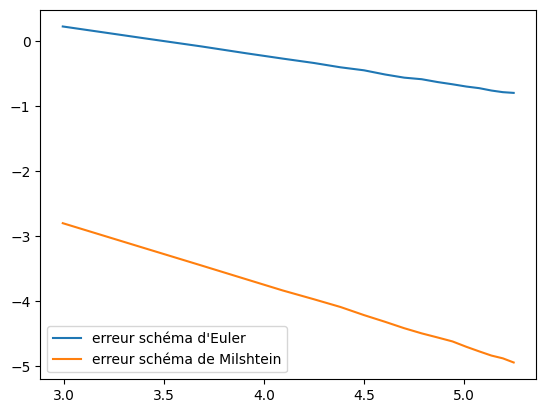

In [38]:
N_l = [n for n in range(20 , 200 , 10)]
err_l = [erreur_schema(n , spot , r , sigma , T, M) for n in N_l]
err_1_l = [np.log(err_l[i][0]) for i in range(len(N_l))]
err_2_l = [np.log(err_l[i][1]) for i in range(len(N_l))]
x = [np.log(n) for n in N_l] 
plt.plot(x , err_1_l , label="erreur schéma d'Euler")
plt.plot(x , err_2_l , label="erreur schéma de Milshtein")
plt.legend()
plt.show()


In [39]:
# estimation des coeff :

model = LinearRegression()
X = np.zeros((len(x) , 1))
X[: , 0] = x
model.fit(X, err_1_l)

print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)



Coefficients : [-0.46071703]
Intercept : 1.6175103946531384


In [40]:
# estimation des coeff :

model = LinearRegression()
X = np.zeros((len(x) , 1))
X[: , 0] = x
model.fit(X, err_2_l)

print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)


Coefficients : [-0.94882919]
Intercept : 0.05346489441651325
